In [21]:
# importing module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#create inflation dataframe
csv_inflation_df = pd.read_csv("Inflation_Worldwide/Inflation-datahcpi_q_t.csv", encoding='latin-1')

inflation_df = csv_inflation_df.drop(csv_inflation_df[csv_inflation_df.index > len(csv_inflation_df['Country Name'] \
.dropna(axis=0))-1].index).dropna(axis=1, how='any').drop(['Indicator Type', 'IMF Country Code', 'Series Name'], axis=1)

quarter_col_list = [col for col in inflation_df.columns if col.endswith('1') or col.endswith('2') or col.endswith('3')]

inflation_df = inflation_df.drop(quarter_col_list, axis=1)

inflation_df.columns = inflation_df.columns.str.replace(r'(\d)$','',regex=True)

tran_inflation_df = inflation_df.drop(['Country Code'], axis=1).set_index('Country Name').transpose()

In [23]:
#create food price index dataframe
csv_food_price_df = pd.read_csv("Inflation_Worldwide/Food_price_indices_data_jun889.csv")

csv_food_price_df.columns = csv_food_price_df.iloc[1]

food_price_df = csv_food_price_df.drop(index=0).drop(index=1).drop(index=2)

food_price_df = food_price_df.dropna(axis=1, how='any')

food_price_df['Date'] = food_price_df['Date'].replace(r'-(\d)(\d)$','',regex=True)

#change data types
float_col_list = [col for col in food_price_df.columns if col!='Date']

for col in float_col_list: 
    food_price_df[col] = food_price_df[col].astype('float')

#Set index to 1990
index_list = ['Food Price Index', 'Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar']

for index in index_list: 
    food_price_df[index] = (food_price_df[index]/food_price_df[index][3]-1)*100

food_price_df = food_price_df.groupby("Date").mean()

In [24]:
#Merge Dataframes
inf_food_df = pd.merge(tran_inflation_df, food_price_df, left_index=True, right_index=True)

inf_food_df.columns

Index(['Argentina', 'Australia', 'Austria', 'Belgium', 'Burkina Faso',
       'Bahrain', 'Bolivia', 'Canada', 'Switzerland', 'Chile', 'Côte d'Ivoire',
       'Cameroon', 'Colombia', 'Costa Rica', 'Germany', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'Spain', 'Finland',
       'France', 'United Kingdom', 'Ghana', 'Greece', 'Guatemala', 'Honduras',
       'Hungary', 'Indonesia', 'India', 'Iran, Islamic Rep.', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Kenya', 'Korea, Rep.', 'Kuwait',
       'Sri Lanka', 'Lesotho', 'Luxembourg', 'Morocco', 'Mexico', 'Myanmar',
       'Mauritius', 'Malaysia', 'Niger', 'Nigeria', 'Netherlands', 'Norway',
       'New Zealand', 'Pakistan', 'Panama', 'Peru', 'Philippines',
       'Papua New Guinea', 'Portugal', 'Paraguay', 'Saudi Arabia', 'Sudan',
       'Senegal', 'Singapore', 'El Salvador', 'Suriname', 'Sweden', 'Togo',
       'Thailand', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Taiwan, China',
       'Tanzania', 'Uruguay'

In [47]:
country = input("Country:")

#Cumulative inflation column added
inf_food_df["Inflation"] = (((inf_food_df[country]/100+1).cumprod())-1)*100

inf_food_df.loc[:,['Inflation', 'Food Price Index']]

Country:United States


,Inflation,Food Price Index
1990,6.220000,-1.690068
1991,9.470332,-3.185127
1992,12.852965,-0.273011
1993,15.956422,-3.380135
1994,19.087245,4.420177
1995,22.278783,19.539782
1996,26.191704,21.138846
1997,28.576728,10.166407
1998,30.608240,0.858034
1999,34.056297,-13.923557


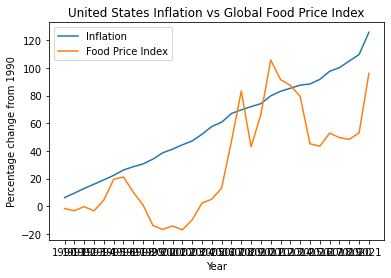

In [48]:

plt.plot(inf_food_df.index, inf_food_df['Inflation'])
plt.plot(inf_food_df.index, inf_food_df['Food Price Index'])

plt.title(f'{country} Inflation vs Global Food Price Index')
plt.xlabel("Year")
plt.ylabel("Percentage change from 1990")
plt.legend(["Inflation", "Food Price Index"])
xticks=inf_food_df.index

plt.show()